# ARUN NAIR PREPCOURSE CAPSTONE

# Questions 

- Comparison of countries which lead crop production (we can simply analyze the top 5, top 7, top 10 produces)

- Does agricultural production in the USSR decline through time? (This can be modeled by a simple time series plotting the year and the total production, this can be also tackled through hypothesis testing, the null hypothesis would be that agricultural production in the USSR *increases*). 

- Regression analysis to predict if a country's production will increase/decrease in time. (Should we just model this as a time series?) We can do both, actually.  


In [16]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cbook as cbook
import seaborn as sns
%matplotlib inline

In [17]:
df= pd.read_csv("fao_data_production_indices_data.csv", low_memory=False)
df

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,2289434.0,A,agriculture_pin
5,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2002.0,1000 Int. $,2216530.0,A,agriculture_pin
6,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2001.0,1000 Int. $,1863022.0,A,agriculture_pin
7,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2000.0,1000 Int. $,1935142.0,A,agriculture_pin
8,Afghanistan,152,Gross Production 1999-2001 (1000 I$),1999.0,1000 Int. $,2345362.0,A,agriculture_pin
9,Afghanistan,152,Gross Production 1999-2001 (1000 I$),1998.0,1000 Int. $,2373424.0,A,agriculture_pin


In [18]:
del df['element_code']
del df['value_footnotes']
df.head()

,country_or_area,element,year,unit,value,category
0,Afghanistan,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,2486910.0,agriculture_pin
1,Afghanistan,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,2278516.0,agriculture_pin
2,Afghanistan,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,2524097.0,agriculture_pin
3,Afghanistan,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,2226346.0,agriculture_pin
4,Afghanistan,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,2289434.0,agriculture_pin


In [19]:
df.describe()

,year,value
count,311624.000000,3.116240e+05
mean,1984.575219,4.021553e+06
std,13.661817,3.617312e+07
min,1961.000000,0.000000e+00
25%,1973.000000,8.400000e+01
50%,1985.000000,1.080000e+02
75%,1997.000000,2.813400e+04
max,2007.000000,1.692538e+09


In [20]:
headers = ["Country", "Production", "Year", "Unit", "Price", "Category"]
df.columns = headers
df.head()

,Country,Production,Year,Unit,Price,Category
0,Afghanistan,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,2486910.0,agriculture_pin
1,Afghanistan,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,2278516.0,agriculture_pin
2,Afghanistan,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,2524097.0,agriculture_pin
3,Afghanistan,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,2226346.0,agriculture_pin
4,Afghanistan,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,2289434.0,agriculture_pin


In [21]:
df.shape

(311634, 6)

In [22]:
df.dropna(inplace=True)
df.shape

(311624, 6)

In [23]:
df.dtypes
#Change dtypes

Country        object
Production     object
Year          float64
Unit           object
Price         float64
Category       object
dtype: object

In [47]:
df[["Price", "Year"]] = df[["Price", "Year"]].astype("int")
df[["Year"]]=df[["Year"]].astype("object")
df.dtypes


#Ask Antonio why year is defined twice

Country       object
Production    object
Year          object
Unit          object
Price          int32
Category      object
dtype: object

In [38]:
Country= df.groupby('Country').sum()
Country.sort_values

<bound method DataFrame.sort_values of                                           Price
Country                                        
Afghanistan                        5.137305e+08
Africa +                           2.113607e+10
Albania                            1.494898e+08
Algeria                            6.302403e+08
American Samoa                     6.042080e+05
Americas +                         7.127633e+10
Angola                             2.221367e+08
Antigua and Barbuda                1.443409e+06
Argentina                          5.393473e+09
Armenia                            5.125982e+07
Asia +                             1.180869e+11
Australia                          3.732254e+09
Australia and New Zealand +        5.300220e+09
Austria                            8.952169e+08
Azerbaijan                         1.304907e+08
Bahamas                            3.921381e+06
Bahrain                            4.454597e+06
Bangladesh                         2.325624e+09
B

In [39]:
df.replace({'Gross Production 1999-2001 (1000 I$)':'Gross Production'}, inplace=True)
df.head()

,Country,Production,Year,Unit,Price,Category
0,Afghanistan,Gross Production,2007,1000 Int. $,2486910,agriculture_pin
1,Afghanistan,Gross Production,2006,1000 Int. $,2278516,agriculture_pin
2,Afghanistan,Gross Production,2005,1000 Int. $,2524097,agriculture_pin
3,Afghanistan,Gross Production,2004,1000 Int. $,2226346,agriculture_pin
4,Afghanistan,Gross Production,2003,1000 Int. $,2289434,agriculture_pin


In [40]:
df.replace({'Net Production 1999-2001 (1000 I$)' : 'Net Production',
            'Gross PIN (base 1999-2001)' : 'Gross PIN',
            'Grs per capita PIN (base 1999-2001)':'Gross Per Capita PIN', 
            'Net PIN (base 1999-2001)':'Net PIN', 
            'Net per capita PIN (base 1999-2001)':'Net Per Capita PIN'}, inplace=True)

In [41]:
df.Category.unique()

array(['agriculture_pin', 'crops_pin', 'food_pin', 'livestock_pin',
       'non_food_pin'], dtype=object)

In [42]:
df.head()

,Country,Production,Year,Unit,Price,Category
0,Afghanistan,Gross Production,2007,1000 Int. $,2486910,agriculture_pin
1,Afghanistan,Gross Production,2006,1000 Int. $,2278516,agriculture_pin
2,Afghanistan,Gross Production,2005,1000 Int. $,2524097,agriculture_pin
3,Afghanistan,Gross Production,2004,1000 Int. $,2226346,agriculture_pin
4,Afghanistan,Gross Production,2003,1000 Int. $,2289434,agriculture_pin


In [43]:
df1 = df.drop(df[df['Production'] != 'Gross Production'].index)
df2 = df1.drop(df1[df1['Category'] != 'agriculture_pin'].index)
df2.tail()

,Country,Production,Year,Unit,Price,Category
63856,Zimbabwe,Gross Production,1965,1000 Int. $,687546,agriculture_pin
63857,Zimbabwe,Gross Production,1964,1000 Int. $,740738,agriculture_pin
63858,Zimbabwe,Gross Production,1963,1000 Int. $,625430,agriculture_pin
63859,Zimbabwe,Gross Production,1962,1000 Int. $,679806,agriculture_pin
63860,Zimbabwe,Gross Production,1961,1000 Int. $,640644,agriculture_pin


In [44]:
gross_prod = df2[['Country', 'Year', 'Price']]
gross_prod.head()

,Country,Year,Price
0,Afghanistan,2007,2486910
1,Afghanistan,2006,2278516
2,Afghanistan,2005,2524097
3,Afghanistan,2004,2226346
4,Afghanistan,2003,2289434


In [76]:
gross_prod2.columns = gross_prod2.columns.astype(str)
gross_prod2 = gross_prod.pivot(index='Country', columns='Year', values='Price')
gross_prod2.set_index('Country', inplace=True)
gross_prod2.head()

KeyError: 'Country'

In [75]:
gross_prod2 = gross_prod.pivot(index='Country', columns='Year', values='Price')
gross_prod2.head()

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1365296.0,1393857.0,1399596.0,1489104.0,1550441.0,1575538.0,1717742.0,1790886.0,1829964.0,1658073.0,...,2373424.0,2345362.0,1935142.0,1863022.0,2216530.0,2289434.0,2226346.0,2524097.0,2278516.0,2486910.0
Africa +,40235510.0,42469530.0,44027500.0,44810030.0,45741720.0,45589030.0,48631010.0,49961520.0,52174760.0,54258640.0,...,105472200.0,109259900.0,110363900.0,113037800.0,116928400.0,122382000.0,126063000.0,130236700.0,135449900.0,130351100.0
Albania,254771.0,274898.0,274310.0,301150.0,291325.0,329062.0,343560.0,343240.0,351221.0,366693.0,...,706612.0,700072.0,733849.0,747971.0,755188.0,789269.0,819870.0,813707.0,858366.0,824818.0
Algeria,1639496.0,1738226.0,1742950.0,1551149.0,1793427.0,1209707.0,1345804.0,1729201.0,1601248.0,1658379.0,...,3033235.0,3107780.0,2941046.0,3215132.0,3269373.0,3863700.0,4211766.0,4221735.0,4404404.0,4225072.0
American Samoa,1750.0,1785.0,2000.0,2005.0,2057.0,2104.0,1941.0,1875.0,1921.0,1850.0,...,2221.0,1781.0,1872.0,2054.0,2126.0,2469.0,2365.0,2365.0,2403.0,2415.0


In [46]:
gross_prod2.columns = gross_prod2.columns.astype(str)
years = list(map(str, range(1961, 2008)))
gap = gross_prod2
gap['Total'] = gap.sum(axis=1)
gap.sort_values(['Total'], ascending=False, axis=0, inplace=True)
gap = gap[years].transpose()
gap.fillna(0, inplace=True)
gap.head()

Country,World +,Asia +,Europe +,Americas +,Eastern Asia +,European Union +,China,Northern America +,Southern Asia +,United States of America,...,Faroe Islands,Niue,Marshall Islands,Greenland,British Virgin Islands,Tuvalu,Nauru,Tokelau,Cayman Islands,Saint Pierre and Miquelon
Year,,,,,,,,,,,,,,,,,,,,,
1961,607542000.0,179038900.0,224694200.0,151225800.0,73769500.0,136224300.0,58340740.0,98065620.0,68169040.0,89816580.0,...,251.0,498.0,0.0,430.0,717.0,473.0,184.0,170.0,0.0,0.0
1962,627390800.0,184564800.0,231333600.0,155494300.0,76666790.0,141587400.0,60690860.0,100191400.0,68317880.0,90275010.0,...,239.0,571.0,0.0,513.0,708.0,474.0,184.0,220.0,0.0,0.0
1963,642877400.0,191333500.0,231958200.0,161601700.0,80440290.0,144877100.0,63942700.0,104454200.0,70574070.0,93700380.0,...,269.0,719.0,0.0,458.0,598.0,476.0,185.0,112.0,0.0,0.0
1964,666254900.0,199301800.0,244458600.0,162971000.0,85929400.0,146292400.0,68462610.0,104573900.0,71804500.0,94323650.0,...,221.0,856.0,0.0,665.0,403.0,513.0,191.0,281.0,0.0,0.0
1965,678915200.0,203996300.0,244380200.0,170410400.0,92461040.0,147757200.0,74747900.0,108850500.0,69926900.0,97704050.0,...,207.0,760.0,0.0,548.0,409.0,514.0,212.0,256.0,0.0,0.0


In [49]:
gap_unwant = [col for col in gap.columns if '+' in col]
gap = gap.drop(gap_unwant, axis=1)
gap.head()

#Ask Antonio about Data cleaning strategies

Country,China,United States of America,India,USSR,Brazil,France,Germany,Italy,Argentina,Indonesia,...,Faroe Islands,Niue,Marshall Islands,Greenland,British Virgin Islands,Tuvalu,Nauru,Tokelau,Cayman Islands,Saint Pierre and Miquelon
Year,,,,,,,,,,,,,,,,,,,,,
1961,58340740.0,89816580.0,50142680.0,72768810.0,16564600.0,23408500.0,22077690.0,18638310.0,11950390.0,7383684.0,...,251.0,498.0,0.0,430.0,717.0,473.0,184.0,170.0,0.0,0.0
1962,60690860.0,90275010.0,50015760.0,73961920.0,17344940.0,26654000.0,24241470.0,19289340.0,12519320.0,8054871.0,...,239.0,571.0,0.0,513.0,708.0,474.0,184.0,220.0,0.0,0.0
1963,63942700.0,93700380.0,51367730.0,70531000.0,17443010.0,25202710.0,25340780.0,18918070.0,13694660.0,7650931.0,...,269.0,719.0,0.0,458.0,598.0,476.0,185.0,112.0,0.0,0.0
1964,68462610.0,94323650.0,52267720.0,81216890.0,17658130.0,25321080.0,24843610.0,19893760.0,12918230.0,8076970.0,...,221.0,856.0,0.0,665.0,403.0,513.0,191.0,281.0,0.0,0.0
1965,74747900.0,97704050.0,49498330.0,80941960.0,20367240.0,26780910.0,23988490.0,20564500.0,12247380.0,7925503.0,...,207.0,760.0,0.0,548.0,409.0,514.0,212.0,256.0,0.0,0.0


# Comparison of countries which lead crop production
# (we can simply analyze the top 5, top 7, top 10 produces)

In [51]:
gap_top10 = gap.transpose()
gap_top10 = gap_top10.head(10)
gap_top10tran = gap_top10.transpose()
gap_top10tran

Country,China,United States of America,India,USSR,Brazil,France,Germany,Italy,Argentina,Indonesia
Year,,,,,,,,,,
1961,58340740.0,89816580.0,50142680.0,72768810.0,16564600.0,23408500.0,22077690.0,18638310.0,11950390.0,7383684.0
1962,60690860.0,90275010.0,50015760.0,73961920.0,17344940.0,26654000.0,24241470.0,19289340.0,12519320.0,8054871.0
1963,63942700.0,93700380.0,51367730.0,70531000.0,17443010.0,25202710.0,25340780.0,18918070.0,13694660.0,7650931.0
1964,68462610.0,94323650.0,52267720.0,81216890.0,17658130.0,25321080.0,24843610.0,19893760.0,12918230.0,8076970.0
1965,74747900.0,97704050.0,49498330.0,80941960.0,20367240.0,26780910.0,23988490.0,20564500.0,12247380.0,7925503.0
1966,80445930.0,97277180.0,49309560.0,90781310.0,19238750.0,25447410.0,25236310.0,21158350.0,13410430.0,8219212.0
1967,81718660.0,101177900.0,52731470.0,92659220.0,20650260.0,27156150.0,27208190.0,22352040.0,14588430.0,7840406.0
1968,81474800.0,103420600.0,55208160.0,98507460.0,21256810.0,28165500.0,27321930.0,21546680.0,13747960.0,9096512.0
1969,82195340.0,104285200.0,56970870.0,93745540.0,22008700.0,26664590.0,26233890.0,22380610.0,14798930.0,9155070.0


In [73]:
gap_top5 = gap.transpose()
gap_top5 = gap_top5.head(5)
gap_top5tran = gap_top5.transpose()
gap_top5tran.columns = gap_top5tran.columns.astype(str)
gap_top5tran


Country,China,United States of America,India,USSR,Brazil
Year,,,,,
1961,58340740.0,89816580.0,50142680.0,72768810.0,16564600.0
1962,60690860.0,90275010.0,50015760.0,73961920.0,17344940.0
1963,63942700.0,93700380.0,51367730.0,70531000.0,17443010.0
1964,68462610.0,94323650.0,52267720.0,81216890.0,17658130.0
1965,74747900.0,97704050.0,49498330.0,80941960.0,20367240.0
1966,80445930.0,97277180.0,49309560.0,90781310.0,19238750.0
1967,81718660.0,101177900.0,52731470.0,92659220.0,20650260.0
1968,81474800.0,103420600.0,55208160.0,98507460.0,21256810.0
1969,82195340.0,104285200.0,56970870.0,93745540.0,22008700.0


C:\Users\nairj\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


ValueError: cannot label index with a null key

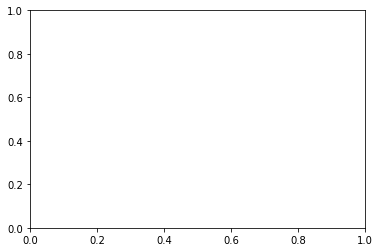

In [80]:
ax= sns.tsplot (x="Country", y="Year", hue="Price", data=gap_top5tran)
sns.palplot(sns.color_palette("RdBu_r", 14))
plt.xticks(rotation=90)
plt.title('Countries VS Years')
plt.xlabel('Countries')
sns.set_context({"figure.figsize": (20, 10)})

In [69]:
gap_top5 = gap.transpose()
gap_top5.columns = gap_top5.columns.astype(str)
gap_top5 = gap_top5.head(5)
gap_top5

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,,,,
China,58340740.0,60690860.0,63942700.0,68462610.0,74747900.0,80445930.0,81718660.0,81474800.0,82195340.0,86542200.0,...,295117400.0,304490200.0,315511100.0,322771800.0,336394800.0,340623800.0,360834700.0,371939300.0,380320200.0,386448200.0
United States of America,89816580.0,90275010.0,93700380.0,94323650.0,97704050.0,97277180.0,101177900.0,103420600.0,104285200.0,102786400.0,...,167311700.0,170083400.0,173640200.0,170755800.0,167494400.0,172458200.0,183519100.0,181432900.0,176803000.0,184698800.0
India,50142680.0,50015760.0,51367730.0,52267720.0,49498330.0,49309560.0,52731470.0,55208160.0,56970870.0,60053830.0,...,137406600.0,143567200.0,142989200.0,147351100.0,137112300.0,151552000.0,149552600.0,156869200.0,164974800.0,175747700.0
USSR,72768810.0,73961920.0,70531000.0,81216890.0,80941960.0,90781310.0,92659220.0,98507460.0,93745540.0,100571500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,16564600.0,17344940.0,17443010.0,17658130.0,20367240.0,19238750.0,20650260.0,21256810.0,22008700.0,22533890.0,...,60706480.0,65353180.0,67416260.0,71250310.0,75603330.0,81198510.0,85626940.0,87363190.0,85319580.0,90075170.0


In [71]:
gap_top5.set_index('Country', inplace=True)
gap_top5.head()

KeyError: 'Country'

AttributeError: Unknown property china

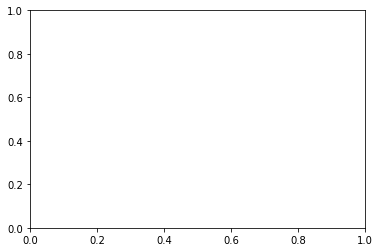

In [79]:
ax= sns.barplot (China="China", Year="Year", Price="Price", data=gap_top5)
sns.palplot(sns.color_palette("RdBu_r", 14))
plt.xticks(rotation=90)
plt.title('Countries VS Years')
plt.xlabel('Countries')
sns.set_context({"figure.figsize": (20, 10)})

# Does agricultural production in the USSR decline through time? (This can be modeled by a simple time series plotting the year and the total production, this can be also tackled through hypothesis testing, the null hypothesis would be that agricultural production in the USSR increases).

C:\Users\nairj\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


ValueError: arrays must all be same length

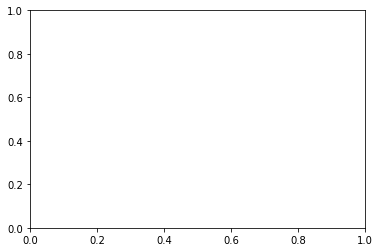

In [83]:
sns.tsplot(gap_top5tran.USSR, time="Year", condition="Production" , value="Price"
)

# Regression analysis to predict if a country's production will increase/decrease in time. (Should we just model this as a time series?) We can do both, actually.